# Representation of data submission workflow components based on W3C-PROV

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from prov.model import ProvDocument
d1 = ProvDocument()

Model is along the concept described in https://www.w3.org/TR/prov-primer/
    

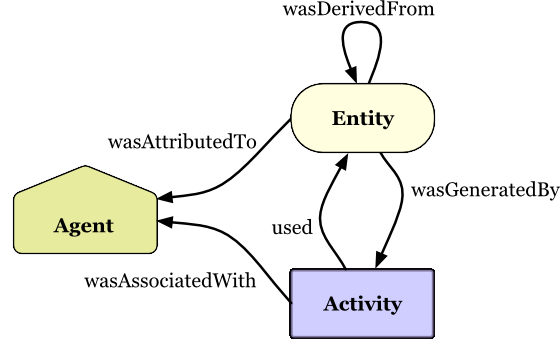

In [3]:
from IPython.display import display, Image
Image(filename='key-concepts.png')

In [12]:
import sys

sys.path.append('/home/stephan/Repos/ENES-EUDAT/submission_forms')
from dkrz_forms import form_handler
from dkrz_forms.config.project_config import project_dicts 
cordex_dict = project_dicts['CORDEX']
from dkrz_forms.config.project_config import name_space

# add namespaces for submission provenance capture

for key,value in name_space.iteritems():
    d1.add_namespace(key,value)

#d1.add_namespace()
# to do: look into some predefined vocabs, e.g. dublin core, iso19139,foaf  etc.

d1.add_namespace("enes_entity",'http://www.enes.org/enes_entitiy#')
d1.add_namespace('enes_agent','http://www.enes.org/enes_agent#')
d1.add_namespace('data_collection','http://www.enes.org/enes_entity/file_collection')
d1.add_namespace('data_manager','http://www.enes.org/enes_agent/data_manager')
d1.add_namespace('data_provider','http://www.enes.org/enes_agent/data_provider')
d1.add_namespace('subm','http://www.enes.org/enes_entity/data_submsission')
d1.add_namespace('foaf','http://xmlns.com/foaf/0.1/')

<Namespace: foaf {http://xmlns.com/foaf/0.1/}>

## Example name spaces 
  (from DOI: 10.3390/ijgi5030038 , mehr unter https://github.com/tsunagun/vocab/blob/master/all_20130125.csv)
    
    owl      Web Ontology Language    http://www.w3.org/2002/07/owl#
    dctype   DCMI Type Vocabulary     http://purl.org/dc/dcmitype/
    dco      DCO  Ontology            http://info.deepcarbon.net/schema#
    prov     PROV Ontology            http://www.w3.org/ns/prov#
    skos     Simple Knowledge
             Organization System      http://www.w3.org/2004/02/skos/core#
    foaf     FOAF Ontology            http://xmlns.com/foaf/0.1/
    vivo     VIVO Ontology            http://vivoweb.org/ontology/core#
    bibo     Bibliographic Ontology   http://purl.org/ontology/bibo/
    xsd      XML Schema Datatype      http://www.w3.org/2001/XMLSchema#
    rdf      Resource Description
             Framework                http://www.w3.org/1999/02/22-rdf-syntax-ns#
    rdfs     Resource Description
             Framework Schema         http://www.w3.org/2000/01/rdf-schema#    

In [13]:
# later: organize things in bundles
data_manager_ats = {'foaf:givenName':'Peter','foaf:mbox':'lenzen@dkzr.de'}

d1.entity('sub:empty')
def add_stage(agent,activity,in_state,out_state):
    # in_stage exists, out_stage is generated
    d1.agent(agent, data_manager_ats)
    d1.activity(activity)
    d1.entity(out_state)
   
    d1.wasGeneratedBy(out_state,activity)
    d1.used(activity,in_state)
    d1.wasAssociatedWith(activity,agent)
    d1.wasDerivedFrom(out_state,in_state)

In [14]:
import json
form_file = open('/home/stephan/tmp/Repos/submission_forms_repo/test/test_ki_sk1.json',"r")
json_info = form_file.read()
#json_info["__type__"] = "sf",
form_file.close()
sf_dict = json.loads(json_info)

In [15]:
sf = form_handler.FForm(sf_dict)

In [17]:
#print sf.__d"lastnameict__["sub"]
print sf.__dict__

{u'project': u'test', u'qua': {u'comment': u'on lizzard ', u'status': u'checked', u'timestamp_started': u'', u'follow_up_ticket': u'', u'target_directory': u'/work/KD0956/qa_results/cmip5/mpi-m/test', u'qua_status': u'', u'ticket_id': u'', u'qa_tool_version': u'dkrz_qa_v09', u'responsible_person': u'hdh', u'timestamp_finished': u'', u'qua_comment': u''}, u'ing': {u'comment': u' copying data from ... to ... using ...  time: about 2 hours, volume: about .. GB ', u'status': u'ingested', u'timestamp_started': u'', u'target_directory': u'/work/kd0956/cmip5/ingest/cmip5/mpi-m/test', u'drsdir_file_pattern': u'', u'drs_file_pattern': u'project:cmip5 | experiment:test| variables: tua,uav', u'responsible_person': u'lenzen', u'timestamp_finished': u'', u'ticket_id': u''}, u'sub': {u'comment': u'terms of use clarified', u'last_name': u'ki', u'package_name': u'test_ki_sk1.json', u'review_comment': u'', u'form_path': u'/home/stephan/tmp/Repos/submission_forms_repo/test/test_ki_sk1.ipynb', u'package_

In [18]:
data_provider = sf.sub["last_name"]
submission_manager = sf.sub['responsible_person']
ingest_manager = sf.ing['responsible_person']
qa_manager = sf.ing['responsible_person']
publication_manager =  sf.pub['responsible_person']

add_stage(agent='data_provider:test_user_id',activity='subm:submit',in_state="subm:empty",out_state='subm:out1_sub')
add_stage(agent='data_manager:peter_lenzen_id',activity='subm:review',in_state="subm:out1_sub",out_state='subm:out1_rev')
add_stage(agent='data_manager:peter_lenzen_id',activity='subm:ingest',in_state="subm:out1_rev",out_state='subm:out1_ing')
add_stage(agent='data_manager:hdh_id',activity='subm:check',in_state="subm:out1_ing",out_state='subm:out1_che')
add_stage(agent='data_manager:katharina_b_id',activity='subm:publish',in_state="subm:out1_che",out_state='subm:out1_pub')
add_stage(agent='data_manager:lta_id',activity='subm:archive',in_state="subm:out1_pub",out_state='subm:out1_arch')


In [ ]:
json_file = open("prov-ingest-1.json",'w')

json_text = d1.serialize()
json_file.write(json_text)

json_file.close()



## assign information to provenance graph nodes and edges

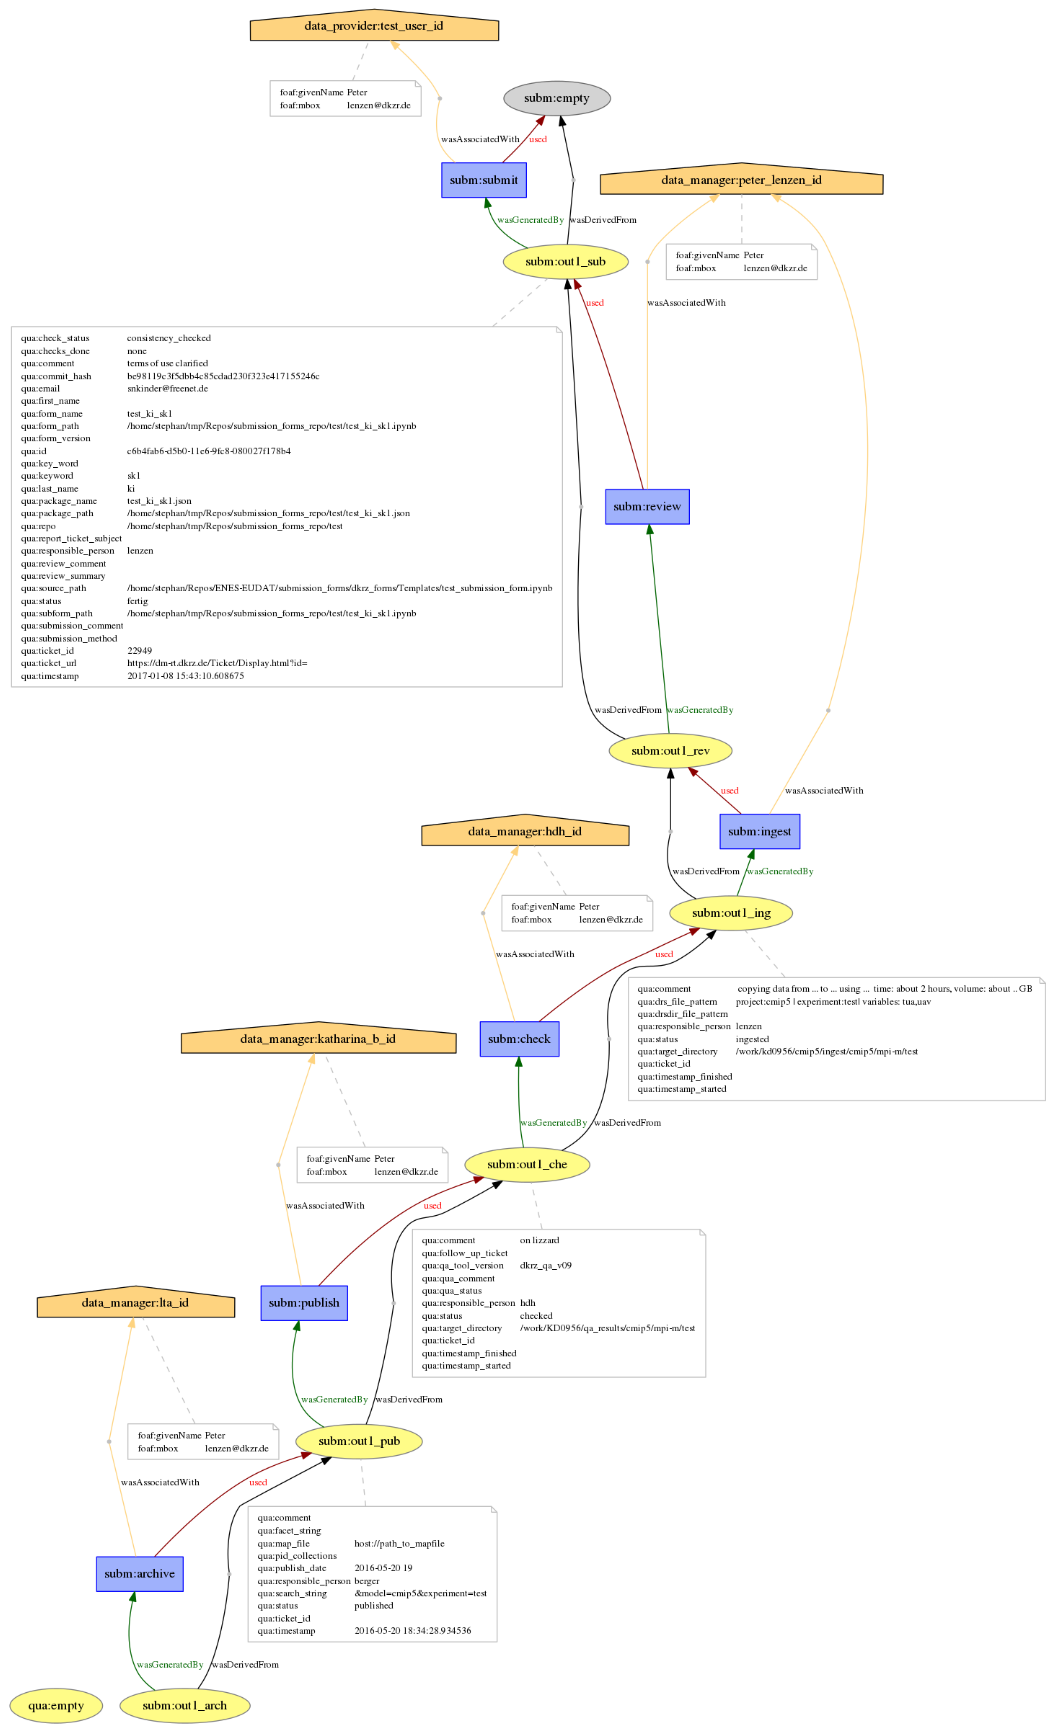

In [27]:
%matplotlib inline
d1.plot()



In [ ]:
d1.wasAttributedTo(data_submission,'????')

# Transform submission object to a provenance graph 

In [25]:
#d1.get_records()
submission = d1.get_record('subm:out1_sub')[0]
review = d1.get_record('subm:out1_rev')[0]
ingest = d1.get_record('subm:out1_ing')[0]
check = d1.get_record('subm:out1_che')[0]
publication = d1.get_record('subm:out1_pub')[0]
lta = d1.get_record('subm:out1_arch')[0]

In [23]:

res = form_handler.prefix_dict(sf.sub,'sub',sf.sub.keys())
res['sub:status']="fertig"
print res
ing = form_handler.prefix_dict(sf.ing,'ing',sf.ing.keys())
che = form_handler.prefix_dict(sf.qua,'qua',sf.qua.keys())
pub = form_handler.prefix_dict(sf.pub,'pub',sf.pub.keys())

{u'sub:ticket_url': u'https://dm-rt.dkrz.de/Ticket/Display.html?id=', u'sub:package_name': u'test_ki_sk1.json', u'sub:repo': u'/home/stephan/tmp/Repos/submission_forms_repo/test', u'sub:timestamp': u'2017-01-08 15:43:10.608675', u'sub:email': u'snkinder@freenet.de', u'sub:package_path': u'/home/stephan/tmp/Repos/submission_forms_repo/test/test_ki_sk1.json', u'sub:form_version': u'', u'sub:subform_path': u'/home/stephan/tmp/Repos/submission_forms_repo/test/test_ki_sk1.ipynb', u'sub:key_word': u'', u'sub:submission_method': u'', u'sub:last_name': u'ki', u'sub:id': u'c6b4fab6-d5b0-11e6-9fc8-080027f178b4', u'sub:comment': u'terms of use clarified', u'sub:responsible_person': u'lenzen', u'sub:review_comment': u'', u'sub:first_name': u'', u'sub:review_summary': u'', u'sub:source_path': u'/home/stephan/Repos/ENES-EUDAT/submission_forms/dkrz_forms/Templates/test_submission_form.ipynb', u'sub:checks_done': u'none', u'sub:report_ticket_subject': u'', u'sub:keyword': u'sk1', u'sub:status': 'ferti

In [26]:
submission.add_attributes(res)
ingest.add_attributes(ing)
check.add_attributes(che)
publication.add_attributes(pub)

In [ ]:
che_act = d1.get_record('subm:check') 
tst = che_act[0]
test_dict = {'subm:test':'test'}
tst.add_attributes(test_dict)

In [ ]:
print tst
tst.FORMAL_ATTRIBUTES
tst.

In [ ]:
che_act = d1.get_record('subm:check') 
#tst.formal_attributes
#tst.FORMAL_ATTRIBUTES
tst.add_attributes({'foaf:name':'tst'})
print tst.attributes
#for i in tst:
 #   print i
#tst.insert([('subm:givenName','sk')])

In [ ]:
import sys
sys.path.append('/home/stephan/Repos/ENES-EUDAT/submission_forms')
from dkrz_forms import form_handler
sf,repo = form_handler.init_form("CORDEX")



init_dict = sf.__dict__ 
sub_form = form_handler.prefix(sf,'subm',sf.__dict__.keys())            

sub_dict = sub_form.__dict__

#init_state = d1.get_record('subm:empty')[0]
#init_state.add_attributes(init_dict)

sub_state = d1.get_record('subm:out1_sub')[0]
init_state.add_attributes(sub_dict)


In [ ]:
tst_dict = {'test1':'val1','test2':'val2'}
tst = form_handler.submission_form(tst_dict) 
print tst.__dict__


In [ ]:
print result.__dict__

In [ ]:
dict_from_class(sf)